# App 3: A three-state markov switching mean-variance model: OIL-CUP

In [2]:
import Pkg
using CSV
using LinearAlgebra
using Optim
using Plots
using Dates 
using Statistics
using PrettyTables
using Distributions
using Polynomials
using UnPack
using DataFrames
using BenchmarkTools
using LaTeXStrings
using LaTeXTabulars
using Parameters

In [10]:
data=CSV.read("./data/POIL_PCU_2021.csv", DataFrame, header=true, decimal=',', delim=";")
POIL = data[:, 1:2]
PCU = select(data, ["Periodo", "PCU"])[145:end,:];
include("./codes/Gen_TSMS.jl"); 
include("./codes/TSMS_functions.jl");

**OIL**

In [7]:
p_gen = @with_kw (ΣTT_prior = [1.0, 5.0, 8.0], 
                  μTT_prior = [0.0, 0.0, 0.0], 
                  ΦTT_prior = [0.0, 0.0],
                  HTT_prior = [0.0, 0.0],
                  P1_1=0.9, P1_2=0.05, P1_3=1-P1_1-P1_2, 
                  P2_1=0.05, P2_2=0.9, P2_3=1-P2_1-P2_2,    
                  P3_1=0.1, P3_2=0.1, P3_3=1-P3_1-P3_2);
Prior = p_gen()

N0 = 2_000; MM0=10_000; stand=false;

@time ΣMM_O, μMM_O, PMM_O, ΦMM_O, sigmamm_O, S1TTMM_O, S2TTMM_O, S3TTMM_O, xt_mn_O, xt_sd_O = gibs_sampling(POIL, Prior; N0=N0, MM0=MM0, stand=stand);

 69.756979 seconds (511.16 M allocations: 67.985 GiB, 16.54% gc time, 14.90% compilation time)


In [8]:
table_out = table_output(Prior, ΣMM_O, μMM_O, PMM_O, ΦMM_O, latex_format=false)
pretty_table(table_out, ["", "Density", "Prior", "Mean", "95%l", "95%h"];formatters = ft_printf("%5.3f"))  

┌─────┬──────────┬───────┬─────────┬─────────┬──────────┐
│     │  Density │ Prior │    Mean │    95%l │     95%h │
├─────┼──────────┼───────┼─────────┼─────────┼──────────┤
│ p11 │     Beta │ 0.900 │   0.942 │   0.917 │    0.963 │
│ p12 │     Beta │ 0.050 │   0.027 │   0.000 │    0.068 │
│ p13 │     Beta │ 0.050 │   0.031 │   0.000 │    0.075 │
│ p21 │     Beta │ 0.050 │   0.158 │   0.003 │    0.379 │
│ p22 │     Beta │ 0.900 │   0.695 │   0.510 │    0.882 │
│ p23 │     Beta │ 0.050 │   0.147 │   0.042 │    0.318 │
│ p31 │     Beta │ 0.100 │   0.021 │   0.000 │    0.050 │
│ p32 │     Beta │ 0.100 │   0.013 │   0.004 │    0.026 │
│ p33 │     Beta │ 0.800 │   0.967 │   0.932 │    0.995 │
│  ϕ1 │   Normal │ 0.000 │   0.279 │   0.129 │    0.379 │
│  ϕ2 │   Normal │ 0.000 │  -0.001 │  -0.012 │    0.032 │
│  σ1 │ InvGamma │ 1.000 │   0.099 │   0.068 │    0.100 │
│  σ2 │ InvGamma │ 5.000 │ 633.218 │ 333.421 │ 1191.814 │
│  σ3 │ InvGamma │ 8.000 │  45.945 │  39.468 │   52.433 │
│  μ1 │   Norm

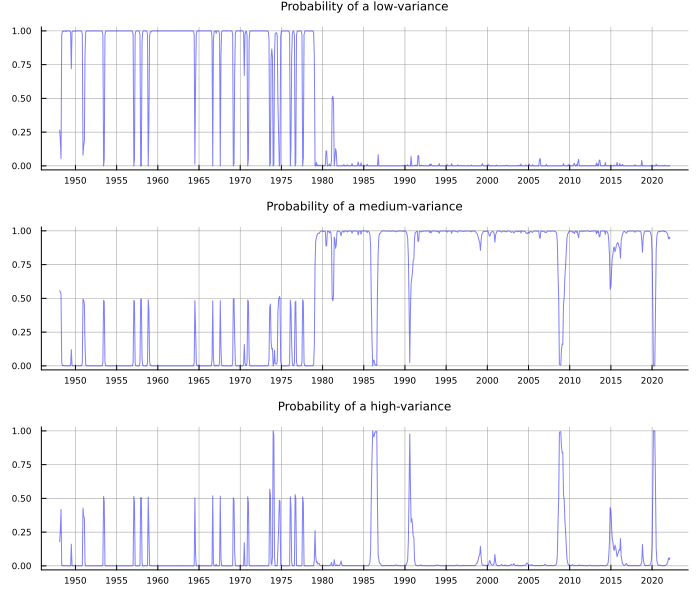

In [12]:
dates = Date(1948,2,1):Month(1):Date(2022,3,1); dates = collect(dates)
plot1, plot2 = plot_output_oil(S1TTMM_O, S3TTMM_O, S2TTMM_O, sigmamm_O, "path", dates)
plot1

**CUP**

In [14]:
p_gen = @with_kw (ΣTT_prior = [1.0, 5.0, 8.0], 
                  μTT_prior = [0.0, 0.0, 0.0], 
                  ΦTT_prior = [0.0, 0.0],
                  HTT_prior = [0.0, 0.0],
                  P1_1=0.9, P1_2=0.05, P1_3=1-P1_1-P1_2, 
                  P2_1=0.05, P2_2=0.9, P2_3=1-P2_1-P2_2,    
                  P3_1=0.1, P3_2=0.1, P3_3=1-P3_1-P3_2);
Prior = p_gen()

N0 = 2_000; MM0=10_000; stand=false
@time ΣMM_C, μMM_C, PMM_C, ΦMM_C, sigmamm_C, S1TTMM_C, S2TTMM_C, S3TTMM_C, xt_mn_C, xt_sd_C = gibs_sampling(PCU, Prior; N0=N0, MM0=MM0, stand=stand);

 40.991771 seconds (444.09 M allocations: 57.041 GiB, 15.23% gc time)


In [15]:
table_out = table_output(Prior, ΣMM_C, μMM_C, PMM_C, ΦMM_C, latex_format=false)
pretty_table(table_out, ["", "Density", "Prior", "Mean", "95%l", "95%h"];formatters = ft_printf("%5.3f"))  

┌─────┬──────────┬───────┬─────────┬────────┬─────────┐
│     │  Density │ Prior │    Mean │   95%l │    95%h │
├─────┼──────────┼───────┼─────────┼────────┼─────────┤
│ p11 │     Beta │ 0.900 │   0.929 │  0.816 │   0.994 │
│ p12 │     Beta │ 0.050 │   0.040 │  0.001 │   0.125 │
│ p13 │     Beta │ 0.050 │   0.031 │  0.001 │   0.110 │
│ p21 │     Beta │ 0.050 │   0.008 │  0.000 │   0.016 │
│ p22 │     Beta │ 0.900 │   0.928 │  0.877 │   0.971 │
│ p23 │     Beta │ 0.050 │   0.064 │  0.026 │   0.115 │
│ p31 │     Beta │ 0.100 │   0.004 │  0.000 │   0.009 │
│ p32 │     Beta │ 0.100 │   0.021 │  0.008 │   0.039 │
│ p33 │     Beta │ 0.800 │   0.975 │  0.956 │   0.990 │
│  ϕ1 │   Normal │ 0.000 │   0.355 │  0.288 │   0.421 │
│  ϕ2 │   Normal │ 0.000 │  -0.090 │ -0.152 │  -0.026 │
│  σ1 │ InvGamma │ 1.000 │   0.437 │  0.023 │   0.110 │
│  σ2 │ InvGamma │ 5.000 │ 101.667 │ 80.787 │ 126.718 │
│  σ3 │ InvGamma │ 8.000 │  19.495 │ 16.354 │  21.730 │
│  μ1 │   Normal │ 0.000 │  -0.085 │ -0.210 │   

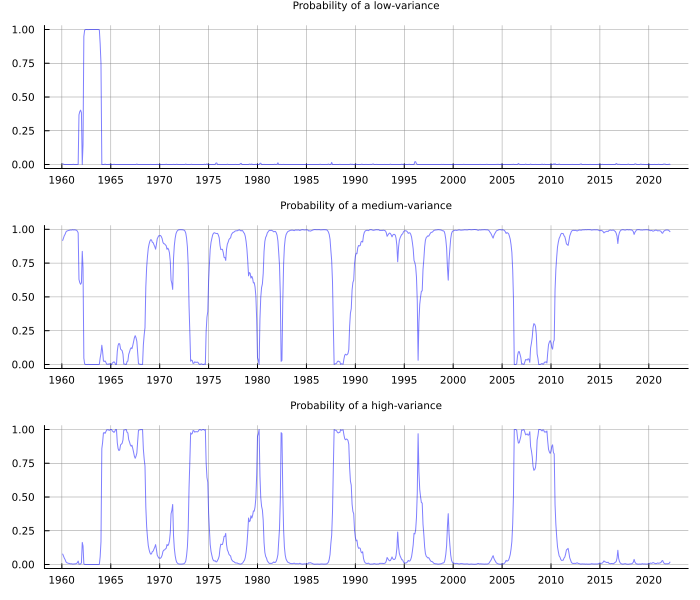

In [16]:
dates = Date(1960,2,1):Month(1):Date(2022,3,1); dates = collect(dates)
plot1, plot2 = plot_output_cu(S1TTMM_C, S3TTMM_C, S2TTMM_C, sigmamm_C, "path", dates)
plot1


## Plots

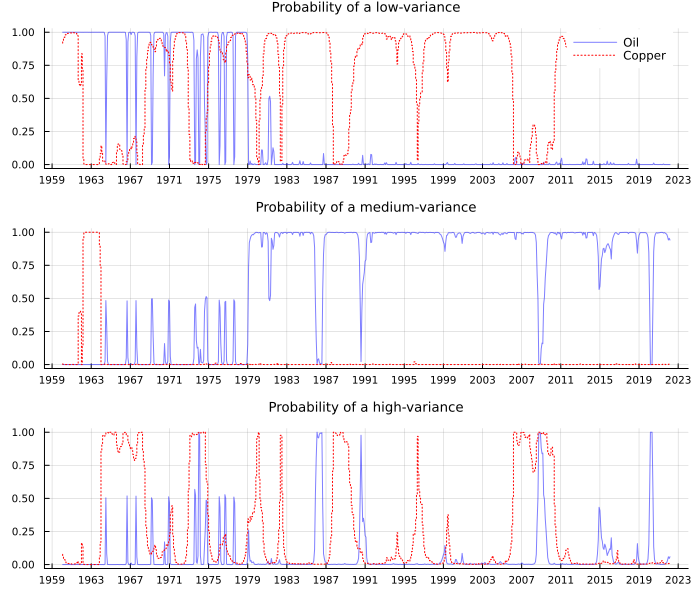

In [17]:
dates = Date(1960,2,1):Month(1):Date(2022,3,1); dates = collect(dates)
plot_output_oil_cu(S1TTMM_O, S3TTMM_O, S2TTMM_O, S3TTMM_C, S1TTMM_C, S2TTMM_C , "path", dates)

## Prices

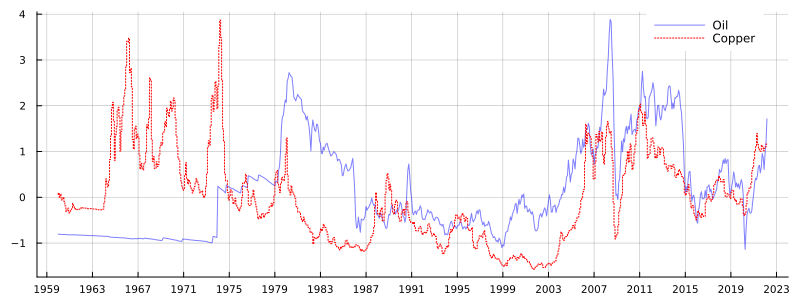

In [18]:
dates = Date(1960,1,1):Month(1):Date(2022,3,1); dates = collect(dates)
p1 = plot_prices(POIL, PCU,  "path", dates, stand=true)